# Load iris data (X,y) from sklearn and Preprocess data

In [1]:
# Load iris data (X,y) from sklearn
from sklearn import datasets
import numpy as np
iris = datasets.load_iris()
X = iris.data[:, [2,3]]
y = iris.target
# print X[0:5]
# print y[0:5]

# Split (X,y) into (X_train, y_train) and (X_test, y_test)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)
print "Total data", len(X), "splitted into", len(X_train), "training set and", len(X_test), "testing set"

# Normalize (X_train, X_test) to (X_train_std, X_test_std)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
print X_train_std.min(), X_train_std.max()
print X_test_std.min(), X_test_std.max()

Total data 150 splitted into 105 training set and 45 testing set
-1.51928365304 1.71018840525
-1.57496420577 1.6373128028


# Train Perceptron

Perceptron result:
Misclassified samples: 4
Accuracy: 0.91


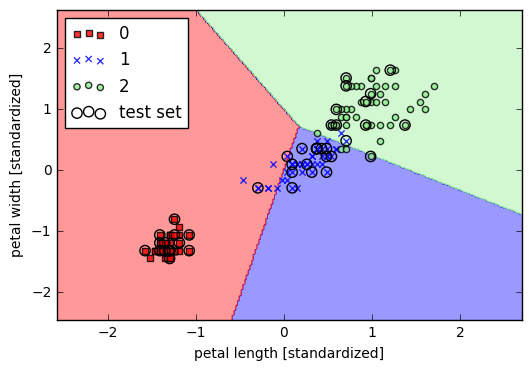

In [2]:
%run 'plot_decision_regions.ipynb'
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron
ppn = Perceptron(n_iter=40, eta0=0.1, random_state=0)

# train perceptron
ppn.fit(X_train_std, y_train)

# predict
y_pred = ppn.predict(X_test_std)

# calculate accuracy
print ('Perceptron result:')
print('Misclassified samples: %d' % (y_test != y_pred).sum())
from sklearn.metrics import accuracy_score
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

# plot decision region
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X=X_combined_std, y=y_combined, classifier=ppn, test_idx=range(105,150))
plt.xlabel('petal length [standardized]') 
plt.ylabel('petal width [standardized]') 
plt.legend(loc='upper left')
plt.show()

# Logistic Regression/Sigmoid activation function

In [ ]:
# Logistic regression intuition and conditional probabilities
# - One of the most widely used algorithms for classification in industry. 
# - Similar to the perceptron and Adaline, the logistic regression model is also a linear model for binary classification 
# - It can be extended to multiclass classification via the OvR technique.

# For example, if we compute Logistic regression intuition for a particular flower sample to be 
# 0.8 then, it means that the chance that this sample is an Iris-Versicolor flower is 80 percent.
# Similarly, the probability that this flower is an Iris-Setosa flower is 20 percent.
# The predicted probability can then simply be converted into a binary outcome via a quantizer 
# (unit step function). Estimating probability like this will be very useful in cases like
# weather forecasting.

# Let's do 2 things:
# First, lets plot logistic function and see wht it looks like: 
# Next, we'll try logisticRegression classifier on our training data and plot the result.

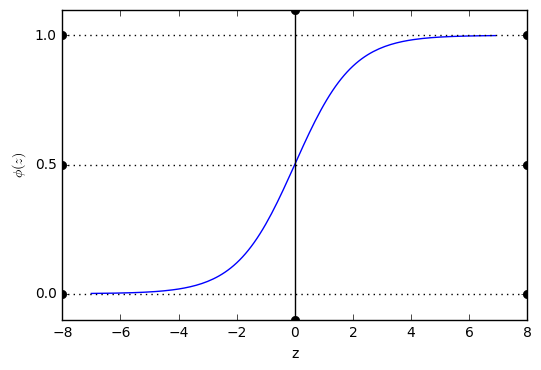

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(z):
    return (1.0 / (1.0 + np.exp(-z)))

z = np.arange(-7, 7, 0.1)
phi_z = sigmoid(z)
p = plt.plot(z, phi_z)
plt.xlabel('z')
plt.yticks([0.0, 0.5, 1.0])
plt.axhline(y=0.5, color='k', marker='o', ls='dotted')
plt.axhline(y=1.0, color='k', marker='o', ls='dotted')
plt.axhline(y=0.0, color='k', marker='o', ls='dotted')
plt.axvline(x=0, color='k', marker='o')
plt.ylim(-0.1, 1.1)
plt.ylabel('$\phi(z)$')
plt.show()


# Train Logistic Regression

Final weight matrix learnt:  [ 2.54373335 -2.3421979 ]
Logistic Regression result:
Misclassified samples: 3
Accuracy: 0.93


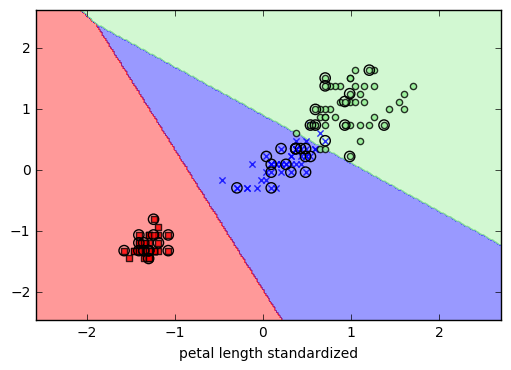

In [4]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=1000.0, random_state=0)

# train
lr.fit(X_train_std, y_train)

# predict
y_test = lr.predict(X_test_std)

# print weight matrix
print "Final weight matrix learnt: ", lr.coef_[1]

# calculate accuracy
print('Logistic Regression result:')
print('Misclassified samples: %d' % (y_test != y_pred).sum())
from sklearn.metrics import accuracy_score
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

# plot decision region
plot_decision_regions(X_combined_std, y_combined, classifier=lr, test_idx=range(105,150))
plt.xlabel('petal width standardized')
plt.xlabel('petal length standardized')
plt.show()

In [23]:
# Regularization is a very useful method to handle collinearity (high correlation 
# among features), filter out noise from data, and eventually prevent overfitting.
# The concept behind regularization is to introduce additional information (bias) 
# to penalize extreme parameter weights. The most common form of regularization 
# is the so-called "L2-REGULARIZATION". In order to apply regularization, we just 
# need to add the regularization term to the cost function.
# Regularization param = lambda/2 * (sumof(w[i])**2)

# The parameter C that is implemented for LogisticRegression in scikit-learn = 1/lambda
# Q&A: Increasing the value of C increases the bias and lowers the variance of the model. why?

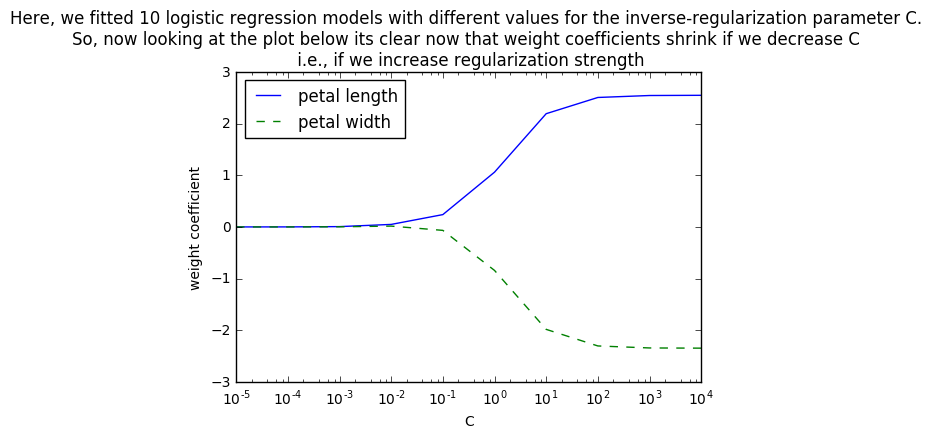

In [5]:
weights, params = [], []
for c in np.arange(-5, 5):
    lr = LogisticRegression(C=10**c, random_state=0)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10**c)

weights = np.array(weights)
plt.plot(params, weights[:, 0], label='petal length')
plt.plot(params, weights[:, 1], linestyle='--', label='petal width')
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.legend(loc='upper left')
plt.xscale('log')
plt.title('Here, we fitted 10 logistic regression models with different values for the inverse-regularization parameter C. \nSo, now looking at the plot below its clear now that weight coefficients shrink if we decrease C \n i.e., if we increase regularization strength')
plt.show()

# SVM
Another reason why svm is so popular is that it can be easily kernelized to solve nonlinear classification problems.

Final weight matrix learnt:  [ 2.54760621 -2.34616582]
SVM result:
Misclassified samples: 3
Accuracy: 0.93


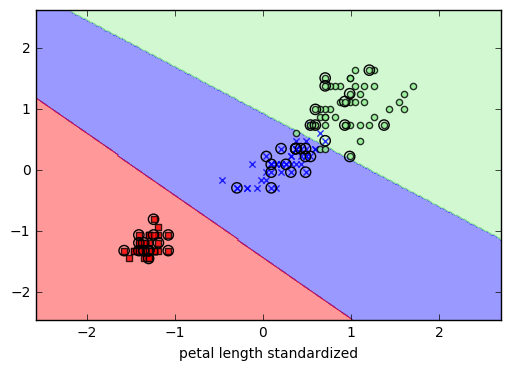

In [6]:
from sklearn.svm import SVC
svm = SVC(kernel='linear', C=1.0, random_state=0)
svm.fit(X_train_std, y_train)

# predict
y_test = lr.predict(X_test_std)

# print weight matrix
print "Final weight matrix learnt: ", lr.coef_[1]

# calculate accuracy
print('SVM result:')
print('Misclassified samples: %d' % (y_test != y_pred).sum())
from sklearn.metrics import accuracy_score
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

# plot decision region
plot_decision_regions(X_combined_std, y_combined, classifier=svm, test_idx=range(105,150))
plt.xlabel('petal width standardized')
plt.xlabel('petal length standardized')
plt.show()


In [7]:
# Above implementations of classifier from scikit are good. However, sometimes our datasets 
# are too large to fit into computer memory. Thus, scikit-learn also offers alternative 
# implementations via the SGDClassifier class, which also supports online learning via the
# partial_fit method. Here's how we define above 3 classifiers using SGDClassifier for 
# online training:
from sklearn.linear_model import SGDClassifier
ppn = SGDClassifier(loss='perceptron')
lr = SGDClassifier(loss='log')
svm = SGDClassifier(loss='hinge')

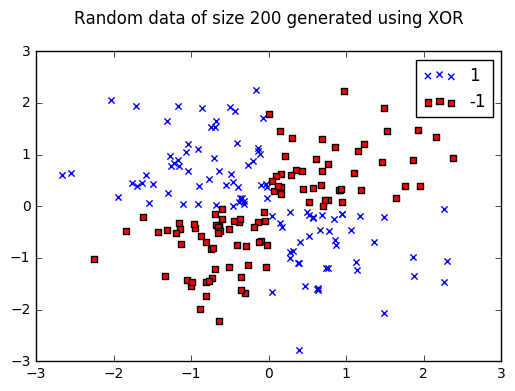

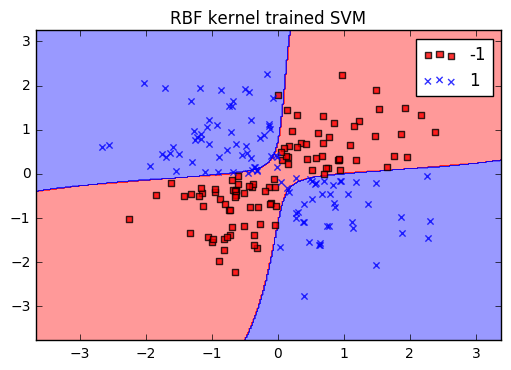

In [8]:
# Solving nonlinear problems using a kernel SVM. Generate random nonlinear data
%run 'RandomDataGenerator.ipynb'
X_xor, y_xor = RandomDataGenerator.use_xor()

# The basic idea behind kernel methods to deal with such linearly inseparable data
# is to create nonlinear combinations of the original features to project them onto
# a higher dimensional space via a mapping function Solving nonlinear problems using
# a kernel SVM where it becomes linearly separable.

svm = SVC(kernel='rbf', random_state=0, gamma=0.10, C=10.0)
svm.fit(X_xor, y_xor)

plot_decision_regions(X_xor, y_xor, classifier=svm)
plt.legend()
plt.title('RBF kernel trained SVM')
plt.show()


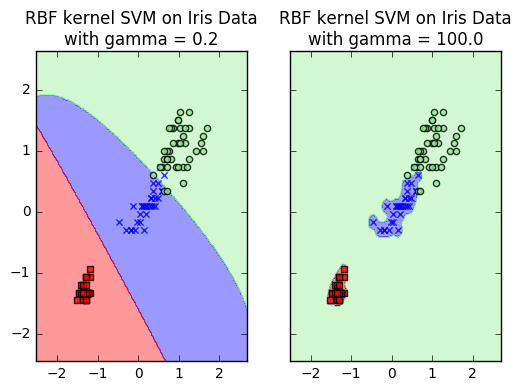

In [9]:
# If we increase the value for Using the kernel trick to find separating hyperplanes 
# in higher dimensional space, we increase the influence or reach of the training samples,
# which leads to a softer decision boundary. 
%run 'plot_decision_regions.ipynb'
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

svm = SVC(kernel='rbf', random_state=0, gamma=0.2, C=1.0)
svm.fit(X_train_std, y_train)

plot_decision_regions(X_train_std, y_train, classifier=svm, ax=ax1)
ax1.set_title('RBF kernel SVM on Iris Data\nwith gamma = 0.2')

svm = SVC(kernel='rbf', random_state=0, gamma=100.0, C=1.0)
svm.fit(X_train_std, y_train)

plot_decision_regions(X_train_std, y_train, classifier=svm, ax=ax2)
ax2.set_title('RBF kernel SVM on Iris Data\nwith gamma = 100.0')
#plt.title('RBF Kernel SVM on Iris data with gamma = 10.0')
plt.show()

# Decision Tree

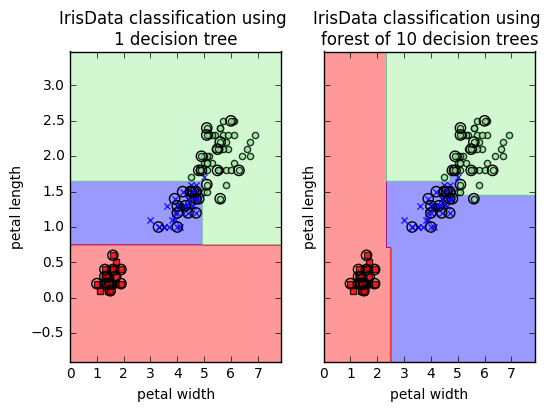

In [46]:
import sklearn.tree as tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# train iris data using forest
forest = RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=1, n_jobs=2)
forest.fit(X_train, y_train)

# train iris data using decision tree
dTree = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
dTree.fit(X_train, y_train)

# plot decision region
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined, y_combined, classifier=dTree, test_idx=range(105,150), ax=ax1)
plot_decision_regions(X_combined, y_combined, classifier=forest, test_idx=range(105,150), ax=ax2)
#plt.legend(loc='upper left')
#plt.title('DesicionTree classifier with entropy on IrisData')
ax1.set_title('IrisData classification using \n1 decision tree')
ax1.set_xlabel('petal width')
ax1.set_ylabel('petal length')
ax2.set_title('IrisData classification using \nforest of 10 decision trees')
ax2.set_xlabel('petal width')
ax2.set_ylabel('petal length')
plt.show()

# TODO: get this working
# from sklearn.tree import export_graphviz
# export_graphviz(dTree, out_file='tree.dot', feature_names=['petal length', 'petal width'])
# import pydot
# (graph,) = pydot.graph_from_dot_file('tree.dot')
# graph.write_png('somefile.png')